In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from pandas import read_csv
from pandas import read_excel
import sklearn
import json
#import urllib2
from datetime import datetime

In [203]:
ship1 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-01-01.csv')
ship2 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-03-01.csv')
ship3 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-04-30.csv')
ship4 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-06-29.csv')

user = pd.read_csv('/Users/parram/Desktop/user_profiles.csv')

adresess = pd.read_csv('/Users/parram/Desktop/addresses.csv')

In [204]:
ship = pd.concat([ship1,ship2,ship3,ship4])
ship = ship.reset_index()

In [205]:
#ship.to_csv('/Users/parram/Desktop/shipments.csv')

In [206]:
ship_new = ship[['user_id', 'ship_address_id', 'shipment_id', 'retailer', 's.city_name', 'total_weight', 
                'total_cost', 'order_completed_at']]
ship_new = ship_new.reset_index()
ship_new = ship_new.drop('index', axis=1)

In [207]:
adresess = adresess.drop_duplicates(subset=['id', 'phone_id'], keep='first')

In [208]:
ship_new.rename(columns=lambda x: x.replace('ship_address_id', 'id'), inplace=True)

In [209]:
data = ship_new.merge(adresess)

In [210]:
train = pd.read_csv('/Users/parram/Desktop/train/train.csv')

In [211]:
data['order_completed_at'] = pd.to_datetime(data['order_completed_at'])
data['month'] = data['order_completed_at'].dt.month
data['weekday'] = data['order_completed_at'].dt.weekday
data = data.drop(['order_completed_at'], axis = 1)

In [212]:
data

,user_id,id,shipment_id,retailer,s.city_name,total_weight,total_cost,phone_id,month,weekday
0,11019,171906,322307,METRO,Москва,30170,168.0,78177,2,1
1,62278,278832,387023,METRO,Москва,11305,98.0,96681,1,4
2,905126,468407,388943,METRO,Москва,13589,98.0,140317,2,2
3,21412,61962,421048,METRO,Москва,9726,158.0,16,1,5
4,42110,378297,442659,METRO,Москва,30323,163.0,60075,1,1
...,...,...,...,...,...,...,...,...,...,...
2260681,274733,12102714,9916517,Лента,Санкт-Петербург,3990,199.0,7693,8,0
2260682,275725,12540588,9916519,METRO,Казань,12390,158.0,285955,8,0
2260683,275725,12540591,9916532,METRO,Казань,12110,158.0,285955,8,0
2260684,275725,12540602,9916540,METRO,Казань,12390,158.0,285955,8,0


In [59]:
ship_new.count()
user.count()

user_id    396820
gender     156472
bdate      156178
dtype: int64

In [60]:
user['bdate'].isna().sum()

240642

In [61]:
user['gender'].isna().sum()

240348

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [130]:
test = pd.read_csv('/Users/parram/Desktop/train/sample_submission.csv', sep=';')
test['order_completed_at'] = '2020-08'
test = test.rename(columns={'Id':'phone_id', 'Predicted':'target'})
test = test.drop(['target'], axis = 1)
test

,phone_id,order_completed_at
0,19843,2020-08
1,471287,2020-08
2,342522,2020-08
3,457799,2020-08
4,233778,2020-08
...,...,...
214604,16841,2020-08
214605,69348,2020-08
214606,594974,2020-08
214607,320024,2020-08


In [132]:
train = pd.read_csv('/Users/parram/Desktop/train/train.csv')
train = train.drop(['target'], axis=1)

In [135]:
merged = pd.concat([train, test])

In [136]:
merged

,phone_id,order_completed_at
0,19843,2020-01
1,19843,2020-02
2,19843,2020-03
3,19843,2020-04
4,19843,2020-05
...,...,...
214604,16841,2020-08
214605,69348,2020-08
214606,594974,2020-08
214607,320024,2020-08


# смски

In [373]:
actions = pd.read_csv('/Users/parram/Desktop/messages/actions.csv')
messages = pd.read_csv('/Users/parram/Desktop/messages/messages.csv')

In [374]:
actions.count()

id         962
subject    523
body       532
type       962
dtype: int64

In [375]:
messages.count()

sent         18275907
action_id    18275907
user_id      18275907
dtype: int64

In [377]:
joined = messages.merge(actions, left_on='action_id', right_on='id')

In [378]:
joined = joined.drop(['id'], axis=1)

In [379]:
joined['date'] = pd.to_datetime(joined['sent'],unit='s')

In [382]:
joined = joined.drop(['sent'], axis=1)

In [383]:
joined = joined.sort_values(by=['user_id','date'], axis=0).reset_index()

In [398]:
joined.groupby(['user_id'])['date'].max()

user_id
1389      2020-04-16 10:55:36
1400      2020-08-30 10:06:49
1459      2020-08-30 10:31:03
1504      2020-08-30 10:28:46
1540      2020-08-30 10:13:08
                  ...        
2925486   2020-08-31 23:21:08
2925490   2020-08-31 23:33:52
2925494   2020-08-31 23:36:59
2925501   2020-08-31 23:42:56
3053874   2020-04-24 15:46:30
Name: date, Length: 583145, dtype: datetime64[ns]

In [384]:
joined[joined['user_id'] == 775026]['body'].unique()

array(['{{event.product.name}} из магазина {{event.store.name}}', nan,
       'А ты уже готов встречать Деда Мороза?? Бегом к нам!🏃\u200d♂️',
       'Заходи, скидки 30%!!! Категория "Дешевле, чем в магазине" 💰 ждёт тебя 🤗\n',
       '1-ая доставка всего за 98 рублей',
       'Пора закупиться по полной, самые выгодные предложения в категории КИБЕРДНИ',
       'Улыбнитесь❤',
       'Теперь осуществляем оплату только по безналичному расчету ',
       'Доставляем ещё из двух магазинов Ашан. Проверь свой адрес ',
       'Цветочек для самой красивой',
       'В связи с повышенным спросом, время до ближайшего слота может быть увеличено. Мы уже занимаемся этим вопросом и скоро будем работать в штатном режиме. Приносим свои извинения за доставленные неудобства.',
       'Минимальная сумма доставки понижена до стандартных настроек от 1500 в зависимости от вашего региона. Приносим извинения за временные неудобства',
       'С заботой, ваш СберМаркет 💚',
       'Выгодные предложения тут. Посмотрим

In [388]:
joined['count'] = 0
count = joined.groupby(['user_id'])['count'].count()
print(count.sort_values(ascending=True))

user_id
1389         1
1944320      1
1944316      1
1944225      1
1944191      1
          ... 
148139     127
334626     127
178475     127
21020      128
775026     135
Name: count, Length: 583145, dtype: int64


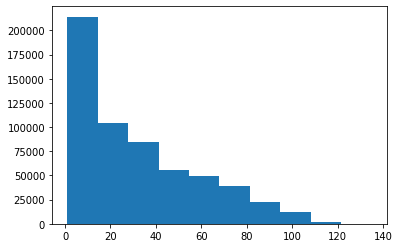

In [389]:
plt.hist(count)
plt.show()

# с тонами

In [532]:
actions_tone = pd.read_csv('/Users/parram/Desktop/messages/actions_tone.csv')

In [553]:
joined1 = messages.merge(actions_tone, left_on='action_id', right_on='id')

In [554]:
joined1['date'] = pd.to_datetime(joined1['sent'],unit='s')

In [555]:
joined1 = joined1.sort_values(by=['user_id','date'], axis=0).reset_index()

In [556]:
joined1 = joined1.drop(['sent', 'index', 'id'],axis=1)

In [557]:
joined1

,action_id,user_id,subject,body,type,tone,date
0,1512.0,1389,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,0.0,2020-04-16 10:55:36
1,1148.0,1400,Новогодние подарки продолжаются!,Скидка 200р по промокоду HNY2020 только до 9 я...,push,1.0,2020-01-05 08:15:54
2,230.0,1400,Скидка {{event.product.discount_percent}}% на ...,{{event.product.name}} из магазина {{event.sto...,push,1.0,2020-01-09 13:00:42
3,1151.0,1400,Старый Новый год не за горами 🎉 🎄,150 рублей на заказ по коду --- plus150 --- к ...,push,1.0,2020-01-10 10:25:09
4,1154.0,1400,NaN,NaN,push,0.0,2020-01-14 09:54:01
...,...,...,...,...,...,...,...
18275902,2807.0,2925501,Теперь заказывать стало проще!,Мы открыли ещё два магазина ЛЕНТА в нашем горо...,push,0.0,2020-08-31 23:42:56
18275903,1011.0,3053874,"Закажите продукты в СберМаркете, а мы привезем...",1-ая доставка всего за 98 рублей,email,-1.0,2020-02-02 14:22:03
18275904,484.0,3053874,В вашей корзине остались товары,Мы сохранили ваши товары в корзине. Можете зав...,email,1.0,2020-02-03 06:38:03
18275905,1512.0,3053874,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже...,email,0.0,2020-04-16 11:09:00


In [558]:
grouped_joined = joined1.groupby('user_id').sum()

In [559]:
grouped_joined1 = joined1.groupby('user_id').count()


In [560]:
grouped_joined2 = joined1.groupby('user_id').last()

In [540]:
grouped_joined['count'] = grouped_joined1['tone']

In [565]:
grouped_joined['last_date'] = grouped_joined2['date']

In [568]:
grouped_joined['count'] = grouped_joined1['date']

In [570]:
grouped_joined

,action_id,tone,last_date,count
user_id,,,,
1389,1512.0,0.0,2020-04-16 10:55:36,1
1400,145749.0,15.0,2020-08-30 10:06:49,88
1459,108250.0,0.0,2020-08-30 10:31:03,52
1504,120445.0,1.0,2020-08-30 10:28:46,62
1540,5674.0,0.0,2020-08-30 10:13:08,2
...,...,...,...,...
2925486,2781.0,1.0,2020-08-31 23:21:08,1
2925490,5265.0,0.0,2020-08-31 23:33:52,2
2925494,18701.0,1.0,2020-08-31 23:36:59,8


In [571]:
grouped_joined['tone'].mean()

4.606442651484622

In [572]:
grouped_joined['tone'].mode()

0    0.0
dtype: float64

In [573]:
grouped_joined

,action_id,tone,last_date,count
user_id,,,,
1389,1512.0,0.0,2020-04-16 10:55:36,1
1400,145749.0,15.0,2020-08-30 10:06:49,88
1459,108250.0,0.0,2020-08-30 10:31:03,52
1504,120445.0,1.0,2020-08-30 10:28:46,62
1540,5674.0,0.0,2020-08-30 10:13:08,2
...,...,...,...,...
2925486,2781.0,1.0,2020-08-31 23:21:08,1
2925490,5265.0,0.0,2020-08-31 23:33:52,2
2925494,18701.0,1.0,2020-08-31 23:36:59,8


In [574]:
print(grouped_joined[grouped_joined['tone']==0].sort_values(by='count', ascending=True))

         action_id  tone           last_date  count
user_id                                            
1389        1512.0   0.0 2020-04-16 10:55:36      1
1863650     1511.0   0.0 2020-05-16 08:22:10      1
1863658     1512.0   0.0 2020-05-16 08:22:54      1
1863666     1511.0   0.0 2020-05-16 08:23:41      1
1863708     1511.0   0.0 2020-05-16 08:27:13      1
...            ...   ...                 ...    ...
774574    157729.0   0.0 2020-08-28 03:02:40     98
776757    159402.0   0.0 2020-08-28 03:04:43     98
857891    166580.0   0.0 2020-08-30 09:47:19     99
701014    178982.0   0.0 2020-08-30 16:08:09    100
716072    159455.0   0.0 2020-08-28 02:02:32    101

[102060 rows x 4 columns]


In [575]:
grouped_joined.to_csv('/Users/parram/Desktop/messages.csv')

In [576]:
grouped_joined.corr()

,action_id,tone,count
action_id,1.000000,0.500177,0.982001
tone,0.500177,1.000000,0.539136
count,0.982001,0.539136,1.000000


# Продукты

In [198]:
june1 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-01.csv')
june2 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-03.csv')
june3 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-05.csv')
june4 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-07.csv')
june5 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-09.csv')
june6 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-11.csv')
june7 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-13.csv')
june8 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-15.csv')
june9 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-17.csv')
june10 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-19.csv')
june11 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-21.csv')
june12 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-23.csv')
june13 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-25.csv')
june14 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-27.csv')
june15 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-06-29.csv')


july1 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-01.csv')
july2 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-03.csv')
july3 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-05.csv')
july4 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-07.csv')
july5 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-09.csv')
july6 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-11.csv')
july7 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-13.csv')
july8 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-15.csv')
july9 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-17.csv')
july10 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-19.csv')
july11 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-21.csv')
july12 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-23.csv')
july13 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-25.csv')
july14 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-27.csv')
july15 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-29.csv')
july16 = pd.read_csv('/Users/parram/Desktop/JuneJuly/line_items_2020-07-31.csv')


august1 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-02.csv')
august2 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-04.csv')
august3 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-06.csv')
august4 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-08.csv')
august5 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-10.csv')
august6 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-12.csv')
august7 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-14.csv')
august8 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-16.csv')
august9 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-18.csv')
august10 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-20.csv')
august11 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-22.csv')
august12 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-24.csv')
august13 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-26.csv')
august14 = pd.read_csv('/Users/parram/Desktop/August/line_items_2020-08-28.csv')

In [199]:
june_1 = pd.concat([june1,june2,june3,june4,june5,june6,june7,june8,june9,june10,june11])
june = pd.concat([june_1,june11, june12, june13, june14, june15])

In [200]:
july_1 = pd.concat([july1,july2,july3,july4,july5,july6,july7,july8,july9,july10,july11])
july = pd.concat([july_1,july11, july12, july13, july14, july15, july16])

In [201]:
august_1 = pd.concat([august1,august2,august3,august4,august5,august6,august7,august8,august9,august10])
august = pd.concat([august11,august12,august13,august14])

In [144]:
august

,shipment_id,master_category_id,created_at,price,discount,item_id,quantity,product_id,brand_name,pricer,replaced,cancelled
0,1268062,592.0,2019-09-01 11:58:01,89.989998,25.010000,17616877,1,37276,Fine Life,Pricer::PerItem,0,0
1,1268062,581.0,2019-09-01 11:58:38,54.590000,18.900000,17616903,1,69591,Pasteroni,Pricer::PerItem,0,0
2,1703270,91.0,2019-11-28 02:07:17,69.980003,10.010000,24297225,1,103839,Без бренда,Pricer::PerPackage,0,0
3,1703270,85.0,2019-11-28 02:07:26,249.000000,20.010000,24297227,1,6005423,Без бренда,Pricer::PerKilo,0,0
4,1703270,85.0,2019-11-28 02:07:28,39.990002,5.000000,24297229,1,5481871,Без бренда,Pricer::PerKilo,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
775828,9295139,601.0,2020-08-16 04:40:00,136.589996,44.419998,152633844,1,4831201,Барни,Pricer::PerItem,0,0
775829,9295139,60.0,2020-08-16 04:40:25,104.900002,26.100000,152633969,1,54478,Pergale,Pricer::PerItem,0,0
775830,9295139,61.0,2020-08-16 04:40:37,84.900002,49.099998,152634029,1,5074500,Nesquik,Pricer::PerItem,0,0
775831,9295139,600.0,2020-08-16 04:41:29,49.900002,15.300000,152634267,1,5044793,Любятово,Pricer::PerItem,0,0


In [145]:
master = pd.read_csv('/Users/parram/Desktop/master_categories.csv')
master

,id,name,parent_category_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2
3,4,Замороженные полуфабрикаты,2
4,5,Рыба замороженная,2
...,...,...,...
1011,1012,Перевязочные материалы,571
1012,1013,Расходные материалы,571
1013,1014,Диагностические тесты,571
1014,1015,Диагностические приборы,571


In [146]:
merged = august.merge(master, left_on='master_category_id', right_on='id')
merged = merged.drop(['discount', 'item_id', 'product_id', 'brand_name', 'pricer', 'replaced', 
                     'parent_category_id'], axis = 1)

In [147]:
merged
merged[merged['name'] == 'Свежие фрукты ']

,shipment_id,master_category_id,created_at,price,quantity,cancelled,id,name
61205,1703270,91.0,2019-11-28 02:07:17,69.980003,1,0,91,Свежие фрукты
61206,1717737,91.0,2019-11-30 06:25:40,62.299999,1,0,91,Свежие фрукты
61207,1717737,91.0,2019-11-30 06:43:21,59.900002,1,0,91,Свежие фрукты
61208,1717737,91.0,2019-11-30 06:43:34,64.900002,1,0,91,Свежие фрукты
61209,2433129,91.0,2020-08-13 10:07:41,168.369995,1,0,91,Свежие фрукты
...,...,...,...,...,...,...,...,...
147022,9285619,91.0,2020-08-15 16:41:00,139.899994,1,0,91,Свежие фрукты
147023,9288467,91.0,2020-08-15 18:41:52,144.000000,1,0,91,Свежие фрукты
147024,9288467,91.0,2020-08-15 18:42:08,149.899994,1,0,91,Свежие фрукты
147025,9291976,91.0,2020-08-15 21:31:00,119.900002,1,0,91,Свежие фрукты


In [148]:
merged['name'].value_counts().head(20)
listok = ['Хлеб, тосты, лаваш', 'Замороженные овощи и смеси', 'Шоколад и шоколадные батончики', 'Молоко', 'Мясо птицы']

In [149]:
nm = merged['name']
def fresh(x):
    if (x == 'Свежие овощи'):
        return 1
    return 0    
merged['fresh vegie id'] = nm.apply(lambda x: fresh(x))
merged['fresh vegie q'] = merged['fresh vegie id'] * merged['quantity']

In [150]:
merged['fresh vegie id'].value_counts()

0    2551396
1     142343
Name: fresh vegie id, dtype: int64

In [151]:
nm = merged['name']
def fruit(x):
    if (x == 'Свежие фрукты '):
        return 1
    return 0    
merged['fresh fruit id'] = nm.apply(lambda x: fruit(x))
merged['fresh fruit q'] = merged['fresh fruit id']*merged['quantity']

In [152]:
merged['fresh fruit id'].value_counts()

0    2607917
1      85822
Name: fresh fruit id, dtype: int64

In [153]:
def others(x):
    if (x in listok):
        return 1
    return 0
merged['others id'] = merged['name'].apply(lambda x: others(x))
merged['others q'] = merged['others id']*merged['quantity']

In [154]:
merged['others id'].value_counts()

0    2394909
1     298830
Name: others id, dtype: int64

In [155]:
products = merged.groupby('shipment_id').sum()[['fresh vegie id', 'fresh fruit id', 'others id', 'fresh vegie q', 
                                     'fresh fruit q', 'others q', 'price']]
products

,fresh vegie id,fresh fruit id,others id,fresh vegie q,fresh fruit q,others q,price
shipment_id,,,,,,,
565513,0,0,2,0,0,2,8257.689983
928663,2,0,3,2,0,4,3335.870014
1186470,6,2,6,6,2,6,7953.240002
1268062,5,3,3,5,3,16,4586.549980
1397106,3,1,1,4,1,1,996.980005
...,...,...,...,...,...,...,...
9834838,5,1,3,7,1,4,5541.090033
9834860,5,0,3,6,0,3,1005.179989
9834861,0,0,0,0,0,0,228.599991


In [132]:
ship1 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-01-01.csv')
ship2 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-03-01.csv')
ship3 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-04-30.csv')
ship4 = pd.read_csv('/Users/parram/Desktop/shipments/shipments2020-06-29.csv')

ship = pd.concat([ship1,ship2,ship3,ship4])
ship = ship.reset_index()

In [133]:
ship

,index,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,...,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at
0,0,11019,171906,322307,2156687,2017-08-03 21:25:23,2020-02-18 14:07:00,2020-02-20 07:00:00,METRO,complete,...,Москва,21,168.0,0,courier,0.0,30170,web,windows,2020-02-20 08:08:54
1,1,62278,278832,387023,3021953,2018-03-02 17:22:04,2020-01-03 13:09:26,2020-01-03 17:00:00,METRO,complete,...,Москва,10,98.0,0,courier,-150.0,11305,web,windows,2020-01-03 18:10:40
2,2,905126,468407,388943,3018198,2018-02-28 11:32:47,2020-02-12 12:39:28,2020-02-13 11:00:00,METRO,complete,...,Москва,21,98.0,5,courier,0.0,13589,app,ios,2020-02-13 12:33:53
3,3,21412,61962,421048,3030227,2018-03-07 20:37:27,2020-01-25 11:58:56,2020-01-25 18:00:00,METRO,complete,...,Москва,8,158.0,0,courier,0.0,9726,web,mac,2020-01-25 19:55:32
4,4,42110,378297,442659,2923996,2017-12-24 11:19:04,2020-01-07 14:30:44,2020-01-07 19:00:00,METRO,complete,...,Москва,2,163.0,0,courier,0.0,30323,web,windows,2020-01-07 19:51:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260681,872753,274733,12102714,9916517,15438866,2020-08-22 20:34:05,2020-08-31 23:56:47,2020-09-01 12:00:00,Лента,complete,...,Санкт-Петербург,200,199.0,0,courier,-250.0,3990,web,windows,NaN
2260682,872754,275725,12540588,9916519,15908183,2020-08-31 23:43:47,2020-08-31 23:45:41,2020-09-01 09:00:00,METRO,canceled,...,Казань,62,158.0,0,courier,-300.0,12390,app,ios,NaN
2260683,872755,275725,12540591,9916532,15908189,2020-08-31 23:45:44,2020-08-31 23:49:03,2020-09-01 09:00:00,METRO,canceled,...,Казань,62,158.0,0,courier,-300.0,12110,app,ios,NaN
2260684,872756,275725,12540602,9916540,15908203,2020-08-31 23:49:06,2020-08-31 23:50:57,2020-09-01 09:00:00,METRO,canceled,...,Казань,62,158.0,0,courier,-300.0,12390,app,ios,NaN


In [134]:
ship['order_created_at'] = pd.to_datetime(ship['order_created_at'])
ship['order_created_at']

0         2017-08-03 21:25:23
1         2018-03-02 17:22:04
2         2018-02-28 11:32:47
3         2018-03-07 20:37:27
4         2017-12-24 11:19:04
                  ...        
2260681   2020-08-22 20:34:05
2260682   2020-08-31 23:43:47
2260683   2020-08-31 23:45:44
2260684   2020-08-31 23:49:06
2260685   2020-08-31 13:30:49
Name: order_created_at, Length: 2260686, dtype: datetime64[ns]

In [135]:
ship = ship[ship['order_created_at'].dt.month == 6]

In [136]:
ship = ship.drop(['index', 'ship_address_id', 'order_id', 'order_created_at', 'shipment_starts_at', 'retailer', 
          's.order_state', 's.city_name', 's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
          'total_weight', 'platform', 'os', 'shipped_at', 'shipment_state'], axis=1)

In [156]:
data_new = ship.merge(products, left_on = 'shipment_id', right_on = 'shipment_id')

In [157]:
data_new = data_new.groupby('user_id').sum()
data_new

,shipment_id,fresh vegie id,fresh fruit id,others id,fresh vegie q,fresh fruit q,others q,price
user_id,,,,,,,,
2449,9834616,0,0,0,0,0,0,2292.420023
4217,9651488,0,0,0,0,0,0,335.000000
4557,9689847,0,0,0,0,0,0,138.009995
5696,9490960,7,6,2,8,7,4,14644.809948
8707,6934767,48,14,8,78,24,15,18748.079941
...,...,...,...,...,...,...,...,...
2903073,9829582,0,0,0,0,0,0,2152.540014
2903389,8403177,0,1,1,0,1,1,1704.250002
2903567,7125317,0,2,8,0,2,12,1325.110001


In [158]:
data_new.to_csv('/Users/parram/Desktop/august.csv')

In [184]:
june_new = pd.read_csv('/Users/parram/Desktop/june.csv')

In [185]:
july_new = pd.read_csv('/Users/parram/Desktop/july.csv')

In [186]:
august_new = pd.read_csv('/Users/parram/Desktop/august.csv')

In [187]:
compare = june_new.merge(july_new, how='left', left_on='user_id', right_on='user_id')

In [191]:
compare['fresh vegie q diff'] = compare['fresh vegie q_y'] - compare['fresh vegie q_x']
compare['fresh fruit q diff'] = compare['fresh fruit q_y'] - compare['fresh fruit q_x']
compare['others q diff'] = compare['others q_y'] - compare['others q_x']
compare['price diff'] = compare['price_y'] - compare['price_x']
compare = compare.fillna(0)

In [192]:
july_to_june = compare[['user_id', 'fresh vegie q diff', 'fresh fruit q diff', 'others q diff', 'price diff']]

In [193]:
july_to_june.to_csv('/Users/parram/Desktop/july_to_june.csv')

In [194]:
compare1 = july_new.merge(august_new, how='left', left_on='user_id', right_on='user_id')

In [195]:
compare1['fresh vegie q diff'] = compare1['fresh vegie q_y'] - compare1['fresh vegie q_x']
compare1['fresh fruit q diff'] = compare1['fresh fruit q_y'] - compare1['fresh fruit q_x']
compare1['others q diff'] = compare1['others q_y'] - compare1['others q_x']
compare1['price diff'] = compare1['price_y'] - compare1['price_x']
compare1 = compare1.fillna(0)

In [196]:
august_to_july = compare1[['user_id', 'fresh vegie q diff', 'fresh fruit q diff', 'others q diff', 'price diff']]

In [197]:
august_to_july.to_csv('/Users/parram/Desktop/august_to_july.csv')